We create the connection to the Postgres database so that we can make the visualizations from the DB.

In [1]:
import os
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv

# Cargar las variables de entorno desde el archivo .env
load_dotenv()

# Variables de entorno
DB_HOST = os.getenv('DB_HOST')
DB_PORT = os.getenv('DB_PORT')
DB_USER = os.getenv('DB_USER')
DB_PASS = os.getenv('DB_PASS')
DB_NAME = os.getenv('DB_NAME')

# Crear la conexión a la base de datos
engine = create_engine(f'postgresql://{DB_USER}:{DB_PASS}@{DB_HOST}:{DB_PORT}/{DB_NAME}')

# Consulta para obtener la tabla fusionada
query = "SELECT * FROM spotify_grammys"

# Leer los datos en un DataFrame de pandas
df_merged = pd.read_sql(query, engine)

# Verificar las primeras filas del DataFrame
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
df_merged.head(5)



,id,year,title,category,nominee,artist,workers,winner,spotify_id,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,danceability,energy,tempo,track_genre
0,1.0,2019.0,62nd Annual GRAMMY Awards (2019),Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",True,2Fxmhks0bxGSBdJ92vM42m,31018.0,2Fxmhks0bxGSBdJ92vM42m,Billie Eilish,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",bad guy,84.0,194087.0,0.701,0.425,135.128,electro
1,2.0,2019.0,62nd Annual GRAMMY Awards (2019),Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",True,0RstfX9nRY1Lfuy1808MoT,NaN,0RstfX9nRY1Lfuy1808MoT,Bon Iver,"i,i","Hey, Ma",58.0,216706.0,0.325,0.286,144.296,None
2,3.0,2019.0,62nd Annual GRAMMY Awards (2019),Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",True,6ocbgoVGwYJhOv1GgI9NsF,20009.0,6ocbgoVGwYJhOv1GgI9NsF,Ariana Grande,"thank u, next",7 rings,84.0,178626.0,0.778,0.317,140.048,dance
3,4.0,2019.0,62nd Annual GRAMMY Awards (2019),Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",True,4IablJ6SqVNGY4vrseyKxu,NaN,4IablJ6SqVNGY4vrseyKxu,H.E.R.,Hard Place,Hard Place,54.0,271733.0,0.614,0.719,160.075,None
4,5.0,2019.0,62nd Annual GRAMMY Awards (2019),Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",True,6g6A7qNhTfUgOSH7ROOxTD,NaN,6g6A7qNhTfUgOSH7ROOxTD,"Jason Derulo, 2 Chainz",Talk Dirty,Talk Dirty (feat. 2 Chainz),67.0,177685.0,0.760,0.652,100.315,None


Visualize how song popularity is distributed across the combined set.

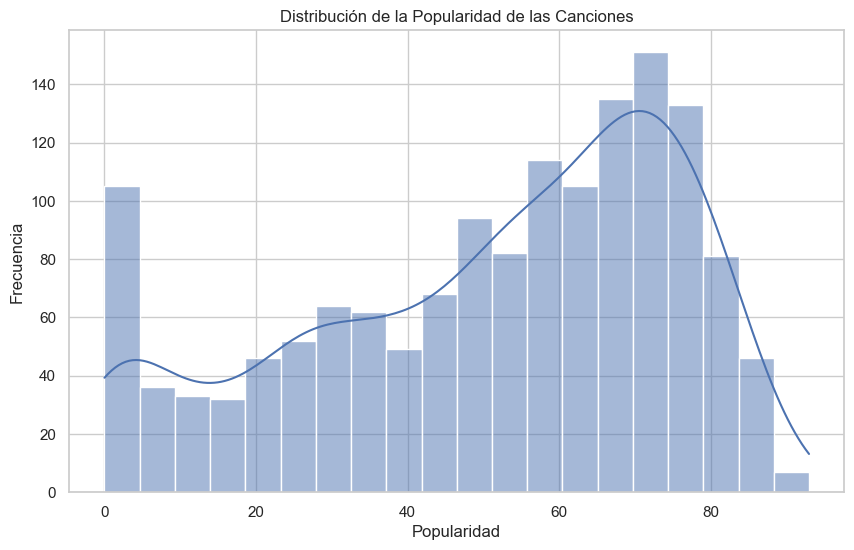

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear un histograma de la popularidad de las canciones
plt.figure(figsize=(10,6))
sns.histplot(df_merged['popularity'], bins=20, kde=True)
plt.title('Distribución de la Popularidad de las Canciones')
plt.xlabel('Popularidad')
plt.ylabel('Frecuencia')
plt.show()


Here we make a graph to see if there is any relationship between the duration of the songs and their popularity.

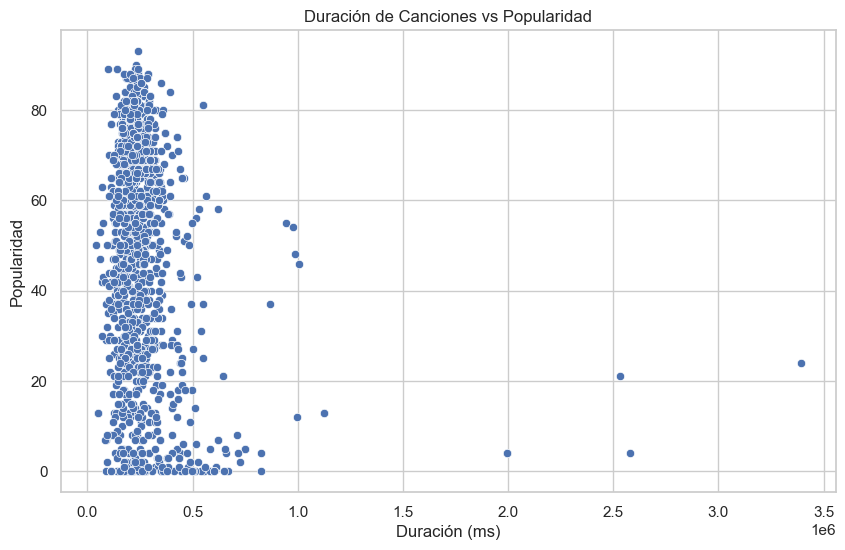

In [3]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='duration_ms', y='popularity', data=df_merged)
plt.title('Duración de Canciones vs Popularidad')
plt.xlabel('Duración (ms)')
plt.ylabel('Popularidad')
plt.show()


We calculate the average popularity of artists and visualize the most popular ones.

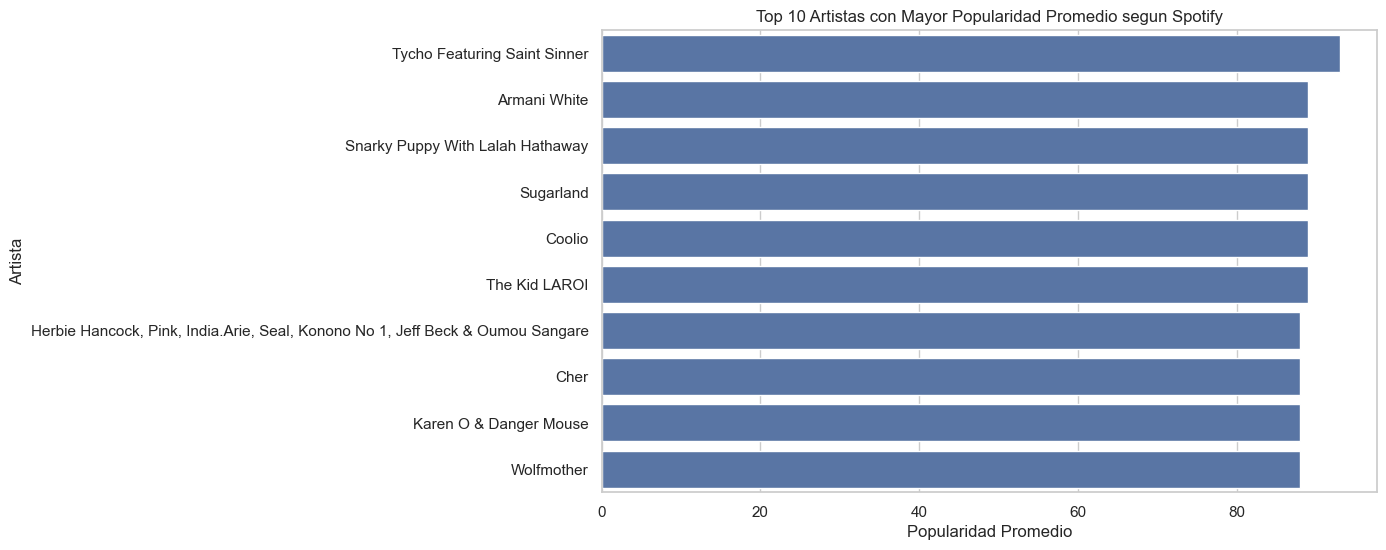

In [4]:
plt.figure(figsize=(10,6))

# Calcular la popularidad promedio por artista
artist_popularity_avg = df_merged.groupby('artist')['popularity'].mean().sort_values(ascending=False).head(10)

# Crear el gráfico
sns.barplot(x=artist_popularity_avg, y=artist_popularity_avg.index)
plt.title('Top 10 Artistas con Mayor Popularidad Promedio segun Spotify')
plt.xlabel('Popularidad Promedio')
plt.ylabel('Artista')
plt.show()

We make a bar graph to visualize which are the 10 artists with the most Grammy awards.

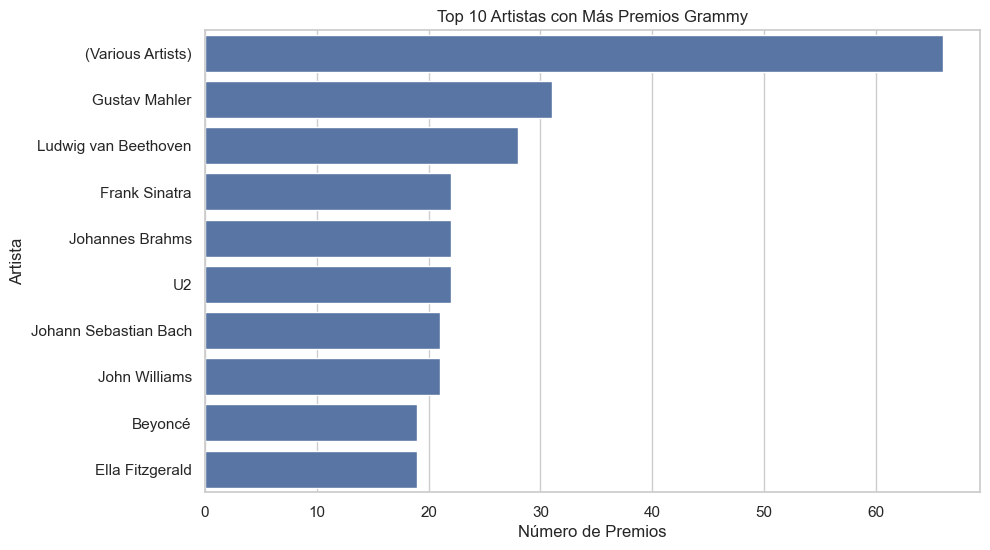

In [5]:
plt.figure(figsize=(10,6))
artist_awards = df_merged['artist'].value_counts().head(10)
sns.barplot(x=artist_awards, y=artist_awards.index)
plt.title('Top 10 Artistas con Más Premios Grammy')
plt.xlabel('Número de Premios')
plt.ylabel('Artista')
plt.show()


We make a chart of the 10 artists with the most awards since 2010

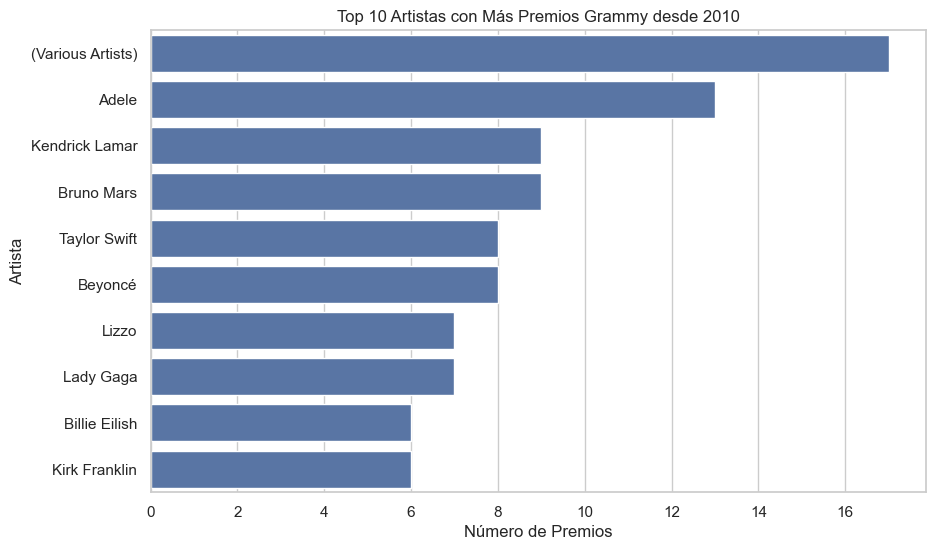

In [6]:
# Filtrar los datos para incluir solo los años desde 2010
df_recent_awards = df_merged[df_merged['year'] >= 2010]

# Contar los artistas con más premios desde 2010
artist_awards_recent = df_recent_awards['artist'].value_counts().head(10)

# Crear el gráfico de barras para los artistas con más premios desde 2010
plt.figure(figsize=(10,6))
sns.barplot(x=artist_awards_recent, y=artist_awards_recent.index)
plt.title('Top 10 Artistas con Más Premios Grammy desde 2010')
plt.xlabel('Número de Premios')
plt.ylabel('Artista')
plt.show()


We make a comparison of how popular certain genres of music are in different charts

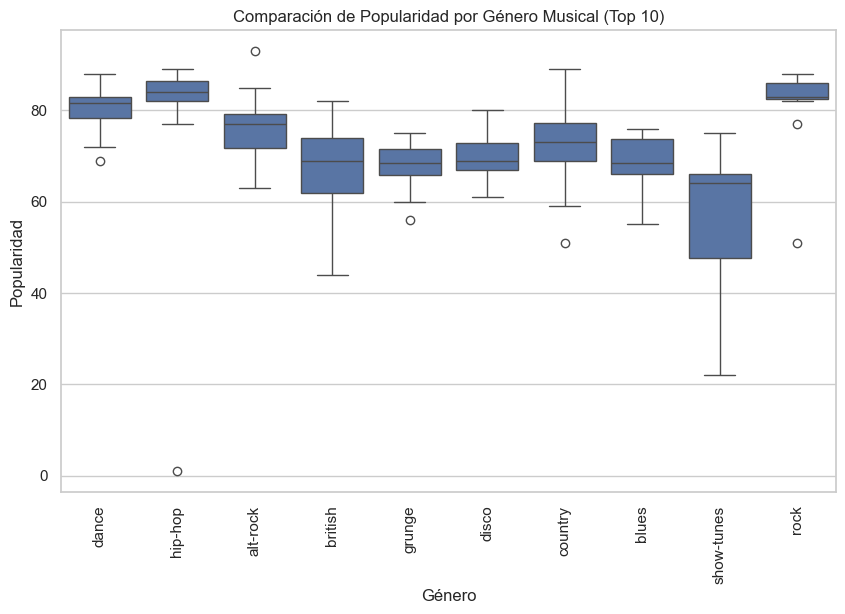

In [7]:
# Contar los géneros más comunes
top_10_genres = df_merged['track_genre'].value_counts().nlargest(10).index

# Filtrar el DataFrame para incluir solo los géneros en el top 10
df_top_10_genres = df_merged[df_merged['track_genre'].isin(top_10_genres)]

# Crear el gráfico
plt.figure(figsize=(10,6))
sns.boxplot(x='track_genre', y='popularity', data=df_top_10_genres)
plt.xticks(rotation=90)
plt.title('Comparación de Popularidad por Género Musical (Top 10)')
plt.xlabel('Género')
plt.ylabel('Popularidad')
plt.show()



Here we filter the top 5 genres with the most data, they are the most concurrent genres in the dataset.

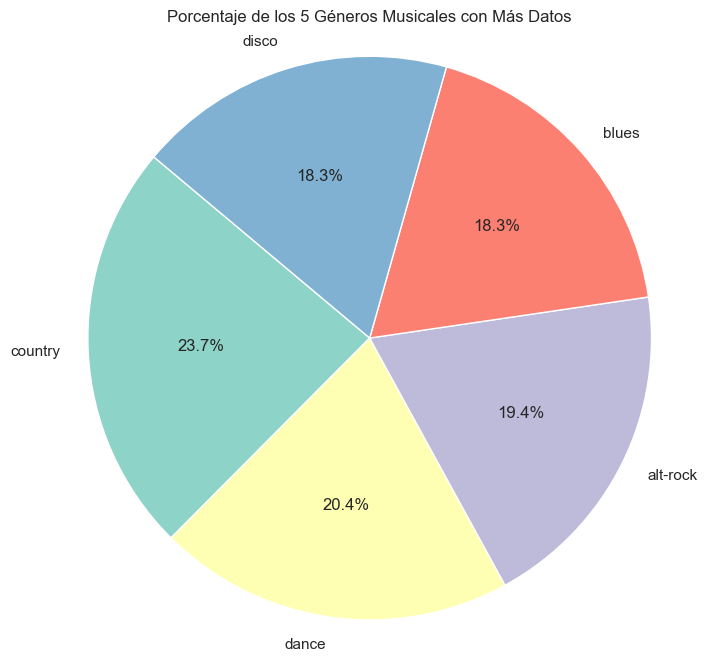

In [8]:
# Contar los géneros más comunes
top_5_genres = df_merged['track_genre'].value_counts().nlargest(5)

# Crear el gráfico de pastel
plt.figure(figsize=(8,8))
plt.pie(top_5_genres, labels=top_5_genres.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title('Porcentaje de los 5 Géneros Musicales con Más Datos')
plt.axis('equal')  # Asegura que el gráfico sea un círculo.
plt.show()


We make a chart with the top 10 years in which the most Grammy Awards were given out

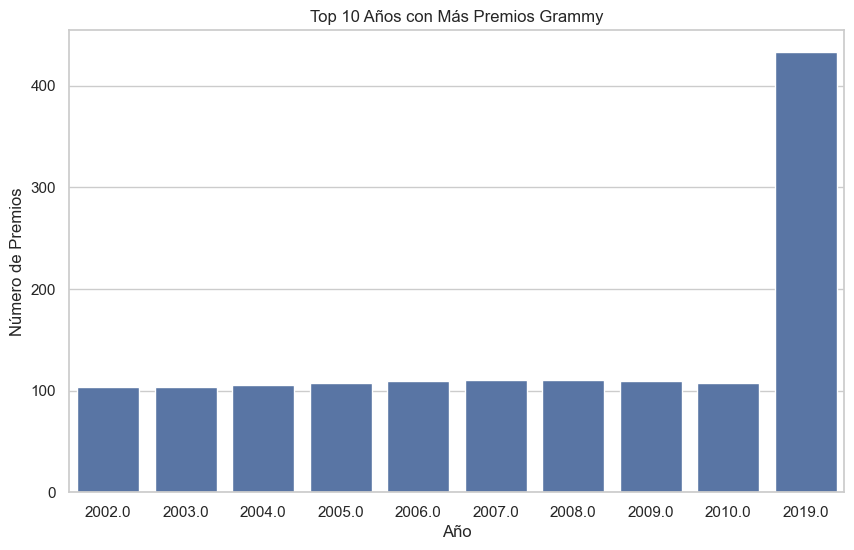

In [9]:
plt.figure(figsize=(10,6))
top_years = df_merged['year'].value_counts().head(10)
sns.barplot(x=top_years.index, y=top_years.values)
plt.title('Top 10 Años con Más Premios Grammy')
plt.xlabel('Año')
plt.ylabel('Número de Premios')
plt.show()


We make a chart with the songs with the most energy along with their artist

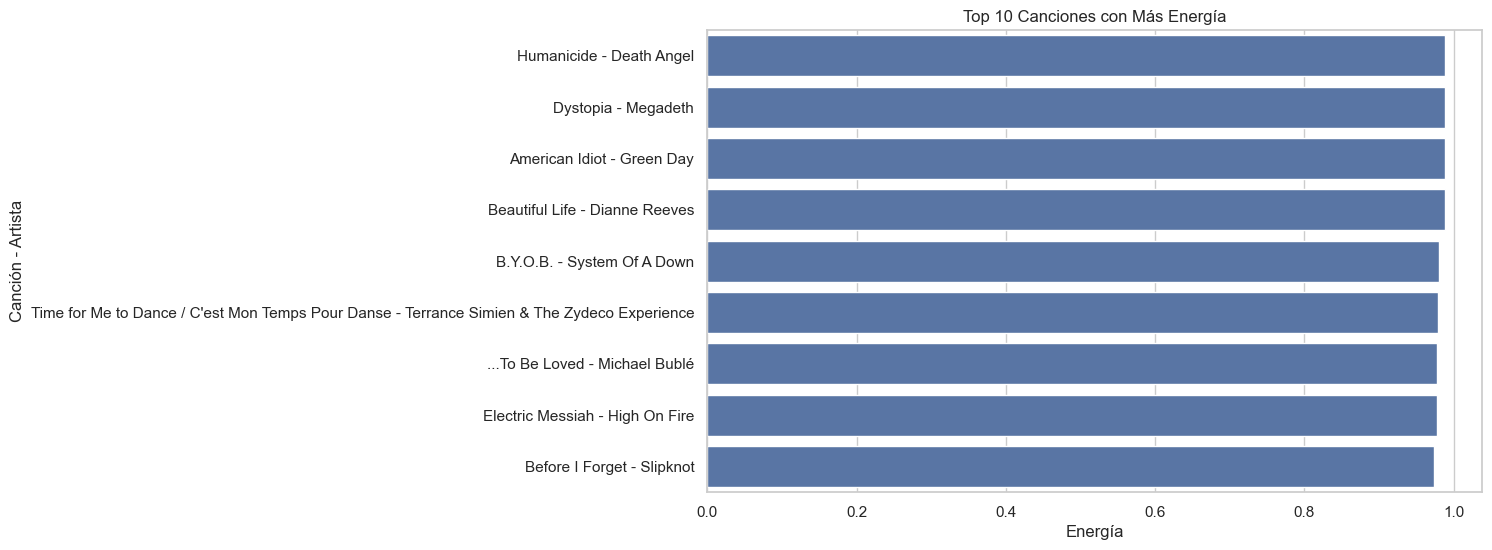

In [10]:
plt.figure(figsize=(10,6))

# Combinar track_name y artists en una sola columna para mostrar ambos en el gráfico
df_merged['track_artist'] = df_merged['track_name'] + ' - ' + df_merged['artist']

# Seleccionar las canciones con más energía
top_energy_songs = df_merged[['track_artist', 'energy']].sort_values(by='energy', ascending=False).head(10)

# Crear el gráfico
sns.barplot(x='energy', y='track_artist', data=top_energy_songs)
plt.title('Top 10 Canciones con Más Energía')
plt.xlabel('Energía')
plt.ylabel('Canción - Artista')
plt.show()


We make a bar graph to see the top 10 artists with the most energy in their songs, where we add the energy of all the songs of each artist.

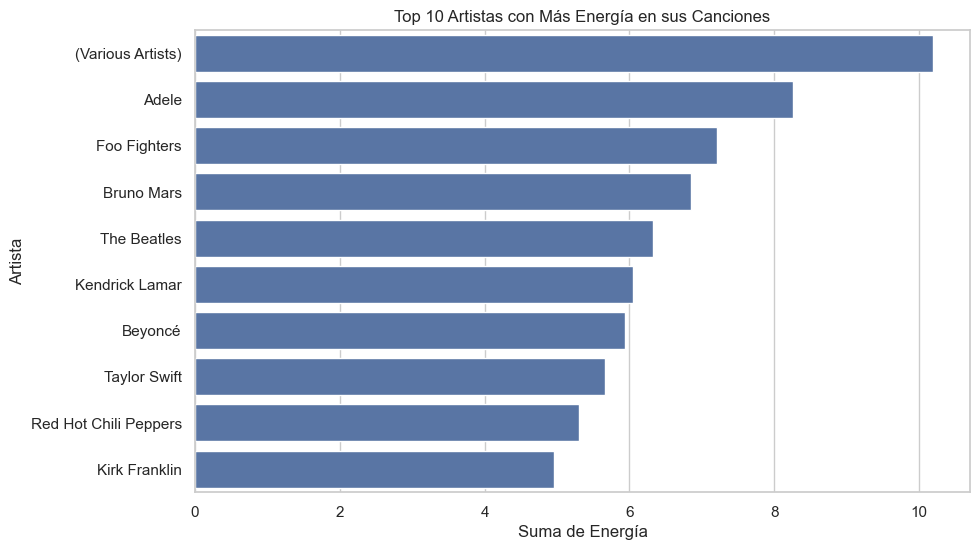

In [11]:
plt.figure(figsize=(10,6))
top_energy_artists = df_merged.groupby('artist')['energy'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_energy_artists.values, y=top_energy_artists.index)
plt.title('Top 10 Artistas con Más Energía en sus Canciones')
plt.xlabel('Suma de Energía')
plt.ylabel('Artista')
plt.show()


We make two graphs: a bar graph and a pie chart to show the distribution of the award categories, this will give us information about the categories that are most seen in the Grammy Awards.

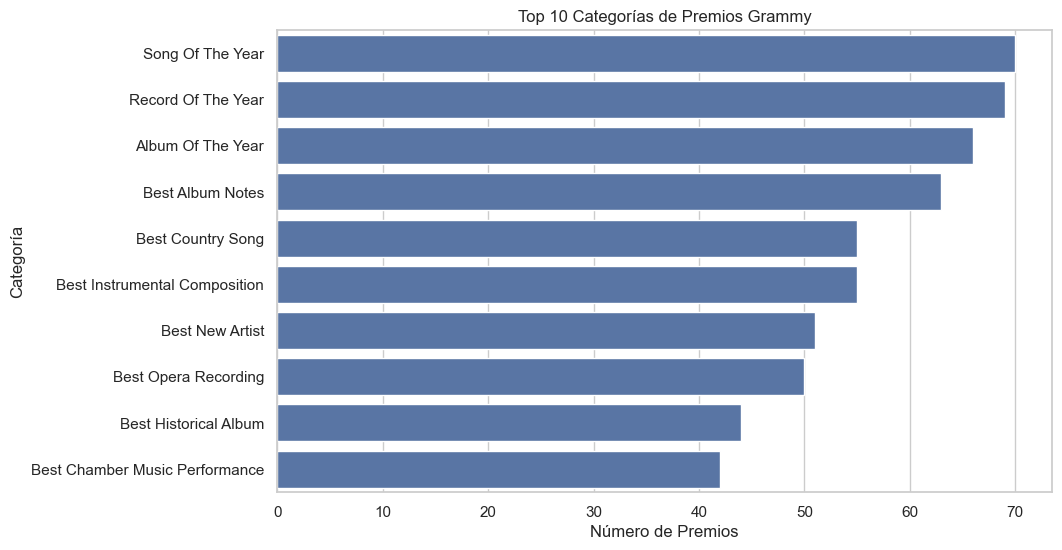

In [12]:
plt.figure(figsize=(10,6))
category_counts = df_merged['category'].value_counts().head(10)
sns.barplot(x=category_counts.values, y=category_counts.index)
plt.title('Top 10 Categorías de Premios Grammy')
plt.xlabel('Número de Premios')
plt.ylabel('Categoría')
plt.show()


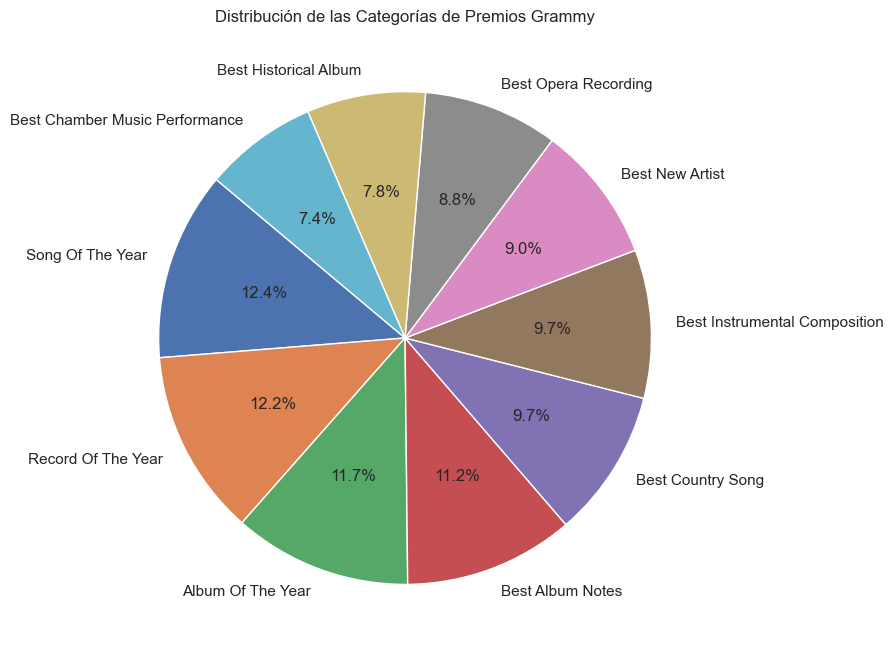

In [13]:
plt.figure(figsize=(8,8))
category_pie = df_merged['category'].value_counts().head(10)
plt.pie(category_pie.values, labels=category_pie.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de las Categorías de Premios Grammy')
plt.show()


We make a graph where we show a top songs with more danceability

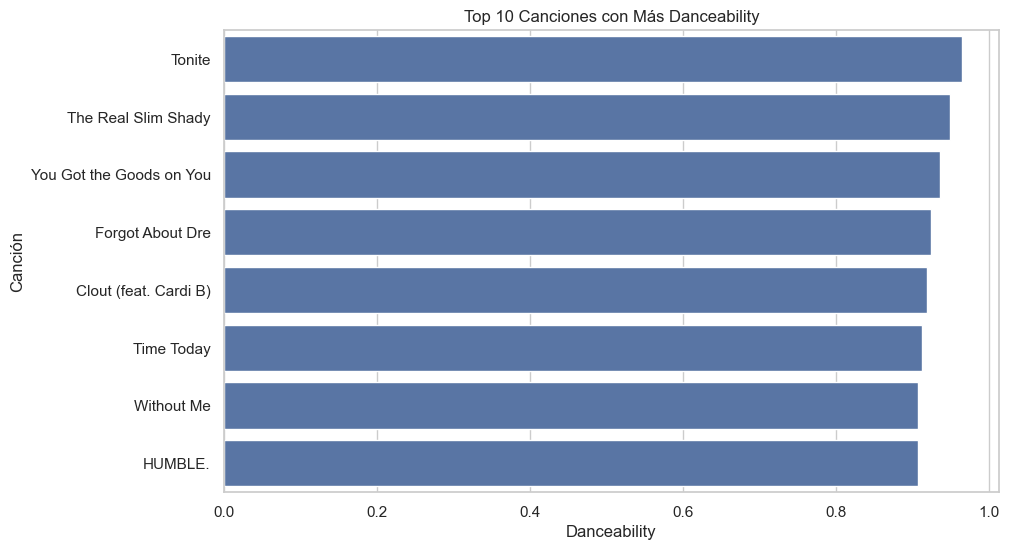

In [14]:
plt.figure(figsize=(10,6))
top_danceability_songs = df_merged[['track_name', 'danceability']].sort_values(by='danceability', ascending=False).head(10)
sns.barplot(x='danceability', y='track_name', data=top_danceability_songs)
plt.title('Top 10 Canciones con Más Danceability')
plt.xlabel('Danceability')
plt.ylabel('Canción')
plt.show()


We make the same visualization of the 10 artists with the most songs in the dataset.

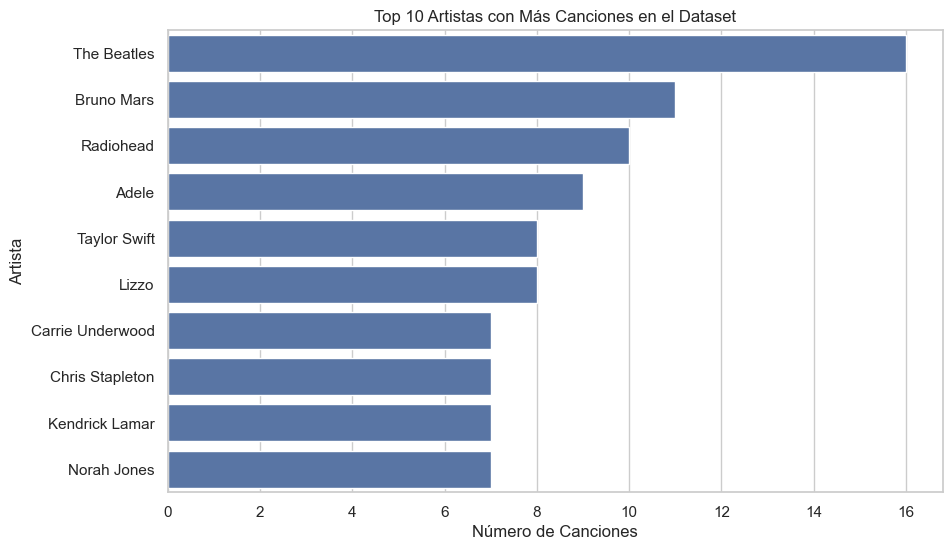

In [16]:
plt.figure(figsize=(10,6))
top_artists_songs = df_merged['artists'].value_counts().head(10)
sns.barplot(x=top_artists_songs.values, y=top_artists_songs.index)
plt.title('Top 10 Artistas con Más Canciones en el Dataset')
plt.xlabel('Número de Canciones')
plt.ylabel('Artista')
plt.show()


We graph which songs have the most durability along with the corresponding artist

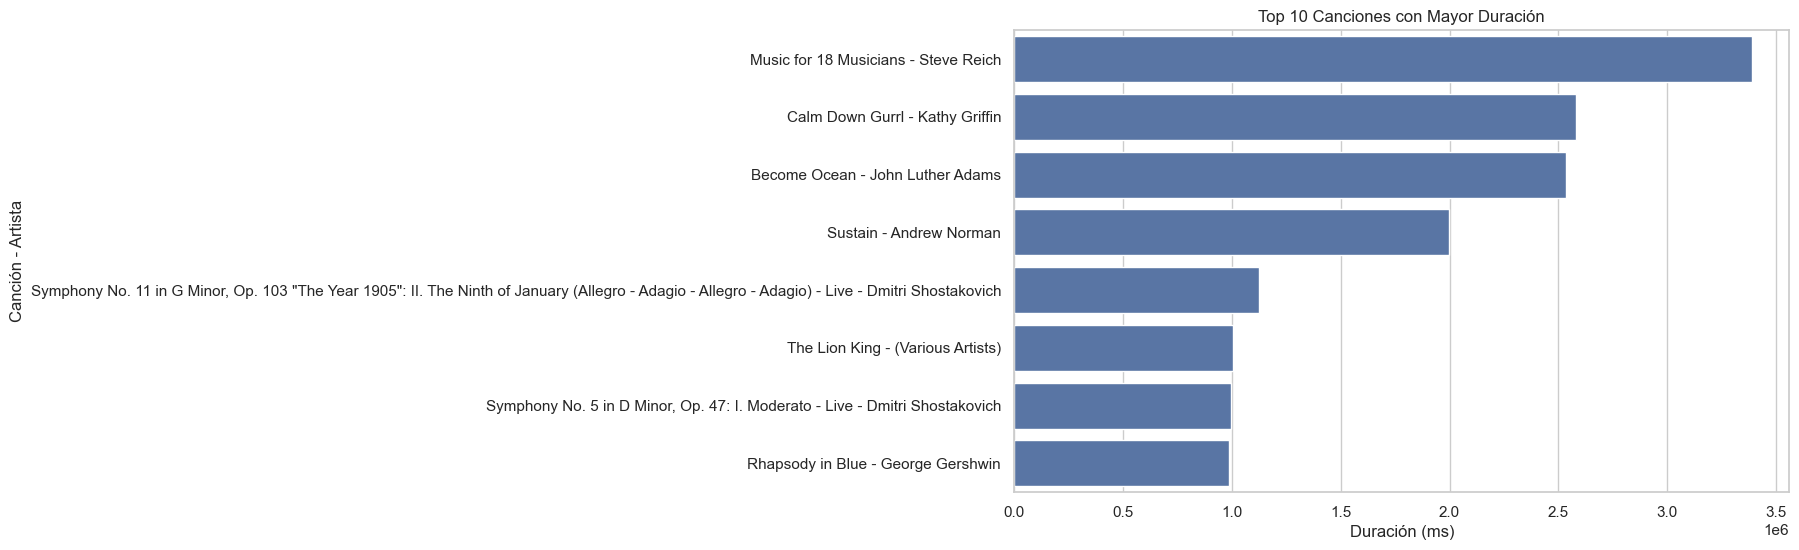

In [17]:
plt.figure(figsize=(10,6))

# Crear una columna que combine 'track_name' y 'artist'
df_merged['track_artist'] = df_merged['track_name'] + ' - ' + df_merged['artist']

# Obtener las 10 canciones con mayor duración, incluyendo el artista
top_duration_songs = df_merged[['track_artist', 'duration_ms']].sort_values(by='duration_ms', ascending=False).head(10)

# Crear el gráfico de barras
sns.barplot(x='duration_ms', y='track_artist', data=top_duration_songs)
plt.title('Top 10 Canciones con Mayor Duración')
plt.xlabel('Duración (ms)')
plt.ylabel('Canción - Artista')
plt.show()


We visualize a top 10 of the years with the most songs in the entire dataset

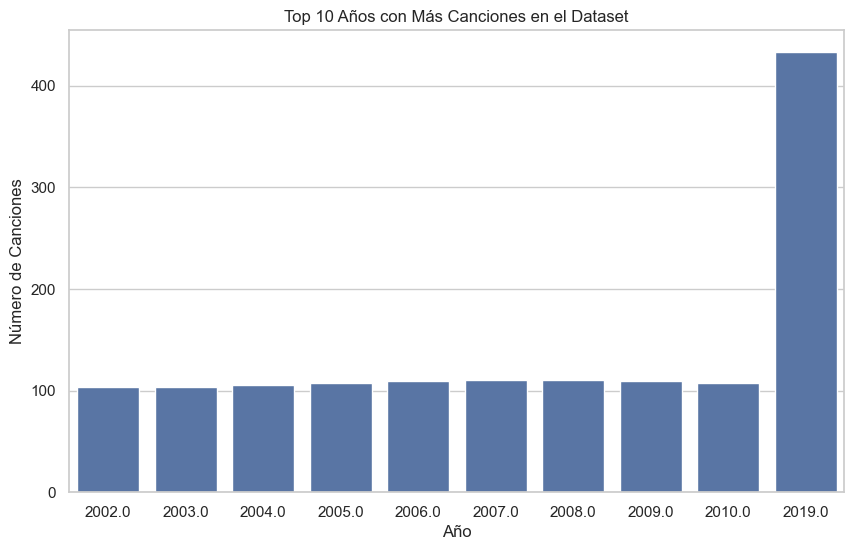

In [18]:
plt.figure(figsize=(10,6))
total_songs_year = df_merged['year'].value_counts().head(10)
sns.barplot(x=total_songs_year.index, y=total_songs_year.values)
plt.title('Top 10 Años con Más Canciones en el Dataset')
plt.xlabel('Año')
plt.ylabel('Número de Canciones')
plt.show()


As we know, a song can have multiple nominations, so we will visualize which are the songs that have had the most nominations along with their corresponding artist.

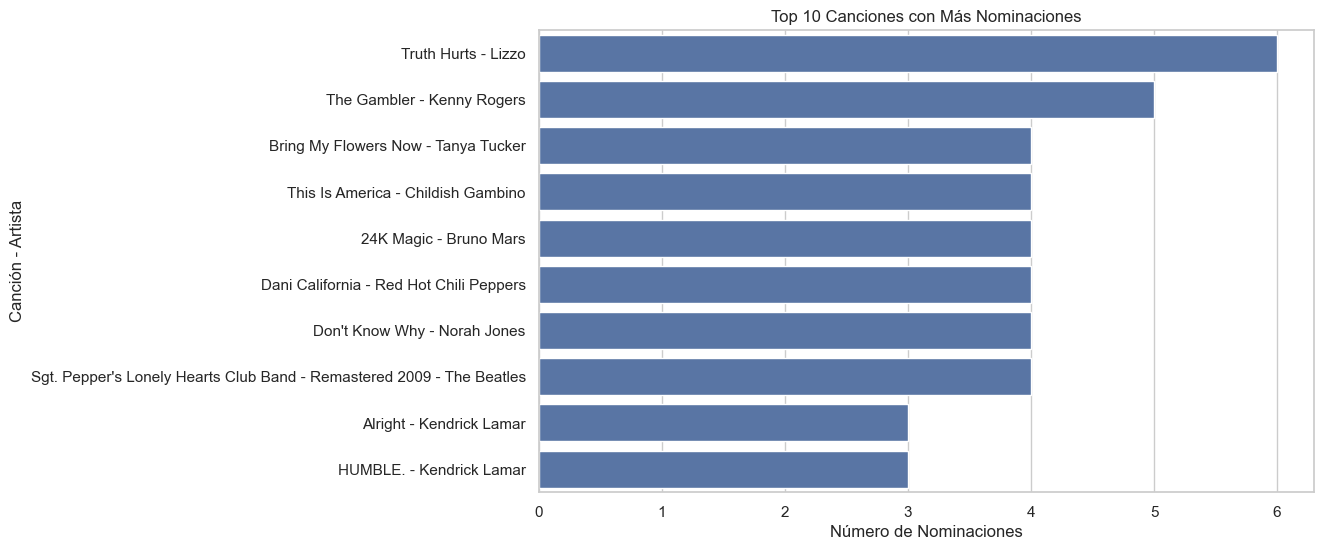

In [19]:
plt.figure(figsize=(10,6))

# Crear una columna que combine 'track_name' y 'artist'
df_merged['track_artist'] = df_merged['track_name'] + ' - ' + df_merged['artist']

# Contar las nominaciones basadas en 'track_artist'
top_nominations = df_merged['track_artist'].value_counts().head(10)

# Crear el gráfico de barras
sns.barplot(x=top_nominations.values, y=top_nominations.index)
plt.title('Top 10 Canciones con Más Nominaciones')
plt.xlabel('Número de Nominaciones')
plt.ylabel('Canción - Artista')
plt.show()


We make a graph to see the evolution of an artist over the years based on their popularity.

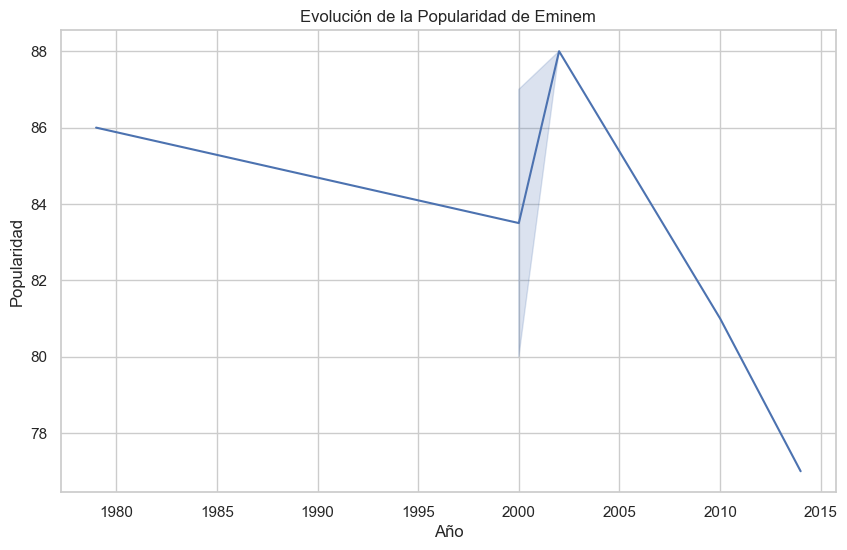

In [23]:
plt.figure(figsize=(10,6))

# Filtrar un artista específico (ejemplo: 'Adele')
artist_name = 'Eminem'
artist_data = df_merged[df_merged['artist'].str.contains(artist_name, na=False)]

# Crear el gráfico de líneas para ver la popularidad de las canciones del artista a lo largo del tiempo
sns.lineplot(x='year', y='popularity', data=artist_data)
plt.title(f'Evolución de la Popularidad de {artist_name}')
plt.xlabel('Año')
plt.ylabel('Popularidad')
plt.show()